# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [2]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [5]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [6]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [7]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [15]:
#dropping some data I no longer need
#... your code here...
df.drop(['starttime','stoptime','start station name','end station name','usertype'], axis=1, inplace=True)
df.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,date,ageM,ageF
0,1346,455,40.750020,-73.969053,265,40.722293,-73.991475,18660,1960.0,2,2015-01-01 00:01:00,NaN,55.0
1,363,434,40.743174,-74.003664,482,40.739355,-73.999318,16085,1963.0,1,2015-01-01 00:02:00,52.0,NaN
2,346,491,40.740964,-73.986022,505,40.749013,-73.988484,20845,1974.0,1,2015-01-01 00:04:00,41.0,NaN
3,182,384,40.683178,-73.965964,399,40.688515,-73.964763,19610,1969.0,1,2015-01-01 00:04:00,46.0,NaN
4,969,474,40.745168,-73.986831,432,40.726218,-73.983799,20197,1977.0,1,2015-01-01 00:05:00,38.0,NaN


In [16]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,40.305272,38.951145
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,11.595240,11.405112
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000,17.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,NaN,1.000000,NaN,NaN
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,NaN,1.000000,NaN,NaN
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,NaN,1.000000,NaN,NaN
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000,89.000000


In [17]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

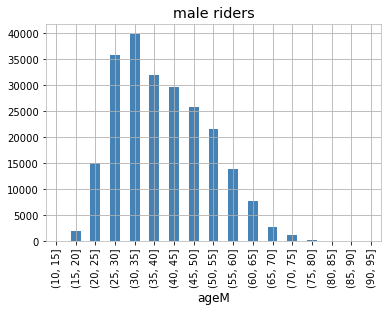

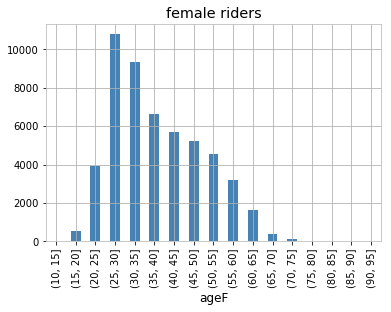

In [18]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


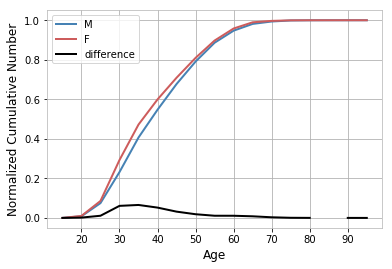

In [12]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [13]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that 
#this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [14]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.09128675483027056, pvalue=1.1723000718567192e-307)


**  FILL IN THE CELL BELOW!**

In [ ]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

##### The scipy KS test returned a K-S statistic and a p-value. The Null Hypothessi for KS test is that  2 independent samples are drawn from the same continuous distribution.If the p-value is very high or K-S statistic is very low then the Null Hypothesis cannot be rejected. In this case since the p-value is much smaller than chosen significant level 5%, we can reject the null hypothesis. 

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

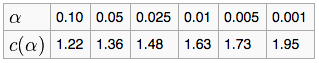

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [17]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS

#### Now redo the test with a subsample of the data: take only 1 ride every of 200

In [46]:
sub = df.loc[::200,:]
sub.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,date,ageM,ageF
0,1346,455,40.750020,-73.969053,265,40.722293,-73.991475,18660,1960.0,2,2015-01-01 00:01:00,NaN,55.0
200,571,297,40.734232,-73.986923,394,40.725213,-73.977688,18003,1965.0,1,2015-01-01 01:36:00,50.0,NaN
400,364,284,40.739017,-74.002638,347,40.728739,-74.007488,21664,1989.0,1,2015-01-01 02:52:00,26.0,NaN
600,284,300,40.728145,-73.990214,503,40.738274,-73.987520,15694,1957.0,1,2015-01-01 07:02:00,58.0,NaN
800,650,394,40.725213,-73.977688,293,40.730287,-73.990765,14994,NaN,0,2015-01-01 09:41:00,NaN,NaN


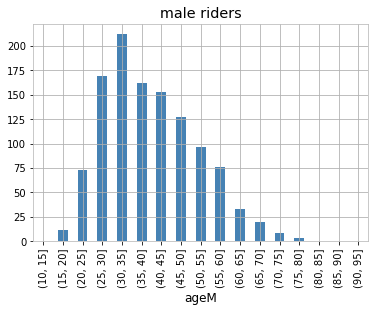

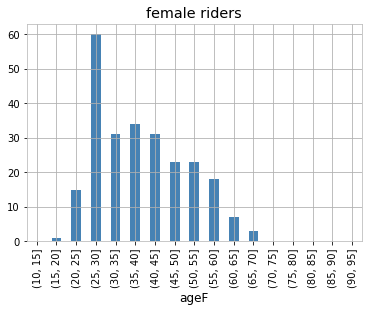

In [37]:
bins = np.arange(10, 99, 5)
axM = sub.ageM.groupby(pd.cut(sub.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = sub.ageF.groupby(pd.cut(sub.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");

#### Figure 3: histogrammed distribution of riders' ages by gender 

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.006406
(20, 25]       0.009130
(25, 30]       0.087303
(30, 35]       0.028328
(35, 40]       0.025178
(40, 45]       0.017686
(45, 50]       0.000362
(50, 55]       0.009216
(55, 60]       0.016069
(60, 65]       0.015728
(65, 70]       0.010471
(70, 75]       0.002618
(75, 80]       0.000000
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


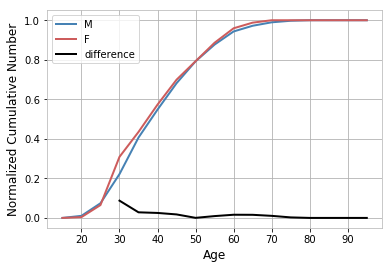

In [38]:
csM=sub.ageM.groupby(pd.cut(sub.ageM, bins)).agg([count_nonzero]).cumsum()

csF=sub.ageF.groupby(pd.cut(sub.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

#### Figure 4: the cumulative distribution of CitiBike riders' ages by gender

In [40]:
sub['ageM'].dropna(inplace= True)
sub['ageF'].dropna(inplace= True)

In [41]:
ks = scipy.stats.ks_2samp(sub.ageM, sub.ageF)
print (ks)

Ks_2sampResult(statistic=0.10841998568198413, pvalue=0.015689150327056155)


#### the KS test returned KS statistic = 0.10841998568198413 and p-value = 0.015689150327056155. Significant level is chosen as 0.05. Since p-value is much smaller than 0.05, we reject null hupothesis. 

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [18]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

#### H$0$: There is no linear relationship between the age distribution by gender
#### H$a$: There is linear relationship between the age distibution by gender

In [74]:
sub.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,date,ageM,ageF
0,1346,455,40.750020,-73.969053,265,40.722293,-73.991475,18660,1960.0,2,2015-01-01 00:01:00,NaN,55.0
200,571,297,40.734232,-73.986923,394,40.725213,-73.977688,18003,1965.0,1,2015-01-01 01:36:00,50.0,NaN
400,364,284,40.739017,-74.002638,347,40.728739,-74.007488,21664,1989.0,1,2015-01-01 02:52:00,26.0,NaN
600,284,300,40.728145,-73.990214,503,40.738274,-73.987520,15694,1957.0,1,2015-01-01 07:02:00,58.0,NaN
800,650,394,40.725213,-73.977688,293,40.730287,-73.990765,14994,NaN,0,2015-01-01 09:41:00,NaN,NaN


In [75]:
sub['ageM'].dropna(inplace= True)
sub['ageF'].dropna(inplace= True)

In [76]:
ageM = np.array(sub['ageM'])
ageF = np.array(sub['ageF'])

In [77]:
ageM.sort()
ageF.sort()

In [78]:
ageM = ageM[0:len(ageF)]

In [79]:
pr = scipy.stats.pearsonr(ageM,ageF)
print(pr)

(0.90915958487353699, 8.3482258237344363e-95)


##### Pearson test returned two values. First one (0.9092) indicationg there is a strong correlation between the two datasets, second value is p-value = 8.3482258237344363e-95. Significant level is chosen as 0.05. Since p-value is much smaller than 0.05, we reject null hupothesis. The two datasets do have linear relationships. 

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [81]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
sp = scipy.stats.spearmanr(ageM,ageF)
print(sp)

SpearmanrResult(correlation=0.99182710082458214, pvalue=3.3878483231382086e-220)


##### Spearsman's test returned two values. First one (0.991827) indicationg there is a strong correlation between the two datasets, second value is p-value = 3.3878483231382086e-220. Significant level is chosen as 0.05. Since p-value is much smaller than 0.05, we reject null hupothesis. The two datasets do have linear relationships. 

# 2. **H0: there is no statistical difference in trip duration of bikers that ride during the day vs night**
#$$ \alpha = 0.05 $$

## K-S test

In [82]:
datestring = '201606'
getCitiBikeCSV(datestring)

('Downloading', '201606')
file in place, you can continue


In [148]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [84]:
datestring2 = '201602'
getCitiBikeCSV(datestring2)

('Downloading', '201602')
file in place, you can continue


In [149]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [150]:
#combining the two months together
cb = pd.concat([df, df2])
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [152]:
cb['date'] = pd.to_datetime(cb['starttime'])
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1,2015-08-01 00:00:04
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2,2015-08-01 00:00:05
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1,2015-08-01 00:00:06
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1,2015-08-01 00:00:09
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1,2015-08-01 00:00:17


In [153]:
cb = cb[cb.usertype=="Subscriber"]
cb["time"] = cb.date.apply(lambda x:x.time())
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,time
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1,2015-08-01 00:00:04,00:00:04
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2,2015-08-01 00:00:05,00:00:05
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1,2015-08-01 00:00:06,00:00:06
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1,2015-08-01 00:00:09,00:00:09
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1,2015-08-01 00:00:17,00:00:17


In [154]:
cb["zoning"] = cb.time.apply(lambda x: "day" if ((x > datetime.time(06,00,00)) & (x < datetime.time(18,00,00)) ) else "night")
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,time,zoning
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1,2015-08-01 00:00:04,00:00:04,night
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2,2015-08-01 00:00:05,00:00:05,night
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1,2015-08-01 00:00:06,00:00:06,night
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1,2015-08-01 00:00:09,00:00:09,night
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1,2015-08-01 00:00:17,00:00:17,night


In [ ]:
bins = np.arange(10, 99, 5)
axD = cb.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("day riders")
axN = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("night riders");

In [155]:
day = cb[cb.zoning=="day"]
night = cb[cb.zoning=="night"]
D = np.array(day['tripduration'])
N = np.array(night['tripduration'])

In [98]:
ks = scipy.stats.ks_2samp(D, N)
print (ks)

Ks_2sampResult(statistic=0.009945787302102771, pvalue=2.4030386204356604e-34)


#### the KS test returned KS statistic = 0.009945787302102771 and p-value = 2.4030386204356604e-34. Significant level is chosen as 0.05. Since p-value is much smaller than 0.05, we reject null hupothesis. 

## Pearson Test

In [165]:
cb = cb.loc[::200, :] 
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,time,zoning
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1,2015-08-01 00:00:04,00:00:04,night
60748,788,8/2/2015 19:07:49,8/2/2015 19:20:58,433,E 13 St & Avenue A,40.729554,-73.980572,151,Cleveland Pl & Spring St,40.721816,-73.997203,14906,Subscriber,1983.0,1,2015-08-02 19:07:49,19:07:49,night
107922,625,8/4/2015 07:17:12,8/4/2015 07:27:38,521,8 Ave & W 31 St,40.750967,-73.994442,346,Bank St & Hudson St,40.736529,-74.006180,18784,Subscriber,1968.0,1,2015-08-04 07:17:12,07:17:12,day
153349,373,8/5/2015 08:40:03,8/5/2015 08:46:16,494,W 26 St & 8 Ave,40.747348,-73.997236,477,W 41 St & 8 Ave,40.756405,-73.990026,15549,Subscriber,1984.0,1,2015-08-05 08:40:03,08:40:03,day
198416,353,8/6/2015 09:51:28,8/6/2015 09:57:22,223,W 13 St & 7 Ave,40.737815,-73.999947,168,W 18 St & 6 Ave,40.739713,-73.994564,20216,Subscriber,1966.0,2,2015-08-06 09:51:28,09:51:28,day


In [157]:
day = cb[cb["zoning"]=="day"]
night = cb[cb["zoning"]=="night"]
D = np.array(day['tripduration'])
N = np.array(night['tripduration'])

In [158]:
D.sort()
N.sort()

In [159]:
scipy.stats.pearsonr(D,N)

ValueError: operands could not be broadcast together with shapes (4361,) (2075,) 

##### Pearson test returned two values. First one (0.1156) indicationg there is a strong correlation between the two datasets, second value is p-value = 0.0. Significant level is chosen as 0.05. Since p-value is much smaller than 0.05, we reject null hupothesis. The trip duration of day and night do have strong linear relationships. 

## Spearsman's Test

In [104]:
scipy.stats.spearmanr(D, N)

SpearmanrResult(correlation=0.99999669082362408, pvalue=0.0)

##### Spearsman's test returned two values. First one (0.99999669082362408) indicates there is a strong correlation between the two datasets, second value is p-value = 0.0. Significant level is chosen as 0.05. Since p-value is much smaller than 0.05, we reject null hupothesis. The trip durations of day and night do have strong linear relationships. 

# 3. **H0: there is no statistical difference in age of bikers for trips originating in Manhattan and in Brooklyn**
#$$ \alpha = 0.05 $$

## KS Test

In [105]:
#Downloading first month
datestring = '201508'
getCitiBikeCSV(datestring)

('Downloading', '201508')
file in place, you can continue


In [106]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [108]:
datestring2 = '201503'
getCitiBikeCSV(datestring2)

('Downloading', '201503')
file in place, you can continue


In [109]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [111]:
join = pd.concat([df, df2])
join.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [112]:
join.drop(['tripduration','starttime','stoptime', 'usertype', 'bikeid', 'gender'], axis=1, inplace=True)
join.head()

,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,birth year
0,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,1987.0
1,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,1968.0
2,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,NaN
3,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,1983.0
4,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,1970.0


In [119]:
# for the sake of saving time, I exported the joined table as csv file and used the QGIS software to select 
# data within Brooklyn and Manhattan.  
join.to_csv(os.getenv("PUIDATA") + "/"  + 'join.csv')

In [120]:
BK = pd.read_csv(os.getenv("PUIDATA") + "/"  + 'BK.csv')
BK.head()

,XCoord,YCoord,OID,FIELD1,START_STAT,START_ST_1
0,-73.995481,40.700379,217,217,40.700379,-73.995481
1,-73.995481,40.700379,218,218,40.700379,-73.995481
2,-73.964763,40.688515,257,257,40.688515,-73.964763
3,-73.960241,40.715348,280,280,40.715348,-73.960241
4,-73.976323,40.683826,333,333,40.683826,-73.976323


In [121]:
MN = pd.read_csv(os.getenv("PUIDATA") + "/"  + 'MN.csv')
MN.head()

,XCoord,YCoord,OID,FIELD1,START_STAT,START_ST_1
0,-73.996951,40.726795,23,23,40.726795,-73.996951
1,-73.977932,40.720828,46,46,40.720828,-73.977932
2,-73.991475,40.722293,49,49,40.722293,-73.991475
3,-73.981420,40.727408,54,54,40.727408,-73.981420
4,-73.977932,40.720828,68,68,40.720828,-73.977932


In [130]:
MN_age = join.iloc[MN.OID,:]
MN_age["age"] = 2015 - MN_age["birth year"]
MN_age

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,birth year,age
23,375,Mercer St & Bleecker St,40.726795,-73.996951,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,1971.0,44.0
46,302,Avenue D & E 3 St,40.720828,-73.977932,301,E 2 St & Avenue B,40.722174,-73.983688,1990.0,25.0
49,265,Stanton St & Chrystie St,40.722293,-73.991475,361,Allen St & Hester St,40.716059,-73.991908,1990.0,25.0
54,445,E 10 St & Avenue A,40.727408,-73.981420,237,E 11 St & 2 Ave,40.730473,-73.986724,1992.0,23.0
68,302,Avenue D & E 3 St,40.720828,-73.977932,301,E 2 St & Avenue B,40.722174,-73.983688,1990.0,25.0
97,266,Avenue D & E 8 St,40.723684,-73.975748,304,Broadway & Battery Pl,40.704633,-74.013617,1983.0,32.0
102,3002,South End Ave & Liberty St,40.711512,-74.015756,402,Broadway & E 22 St,40.740343,-73.989551,1989.0,26.0
111,375,Mercer St & Bleecker St,40.726795,-73.996951,428,E 3 St & 1 Ave,40.724677,-73.987834,1983.0,32.0
141,335,Washington Pl & Broadway,40.729039,-73.994046,503,E 20 St & Park Ave,40.738274,-73.987520,1988.0,27.0
157,335,Washington Pl & Broadway,40.729039,-73.994046,453,W 22 St & 8 Ave,40.744751,-73.999154,1989.0,26.0


In [129]:
BK_age = join.iloc[BK.OID,:]
BK_age["age"] = 2015 - BK_age["birth year"]
BK_age

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,birth year,age
217,216,Columbia Heights & Cranberry St,40.700379,-73.995481,216,Columbia Heights & Cranberry St,40.700379,-73.995481,NaN,NaN
218,216,Columbia Heights & Cranberry St,40.700379,-73.995481,216,Columbia Heights & Cranberry St,40.700379,-73.995481,NaN,NaN
257,399,Lafayette Ave & St James Pl,40.688515,-73.964763,364,Lafayette Ave & Classon Ave,40.689004,-73.960239,1987.0,28.0
280,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,460,S 4 St & Wythe Ave,40.712859,-73.965903,1983.0,32.0
333,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,217,Old Fulton St,40.702772,-73.993836,1995.0,20.0
334,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,217,Old Fulton St,40.702772,-73.993836,1995.0,20.0
409,216,Columbia Heights & Cranberry St,40.700379,-73.995481,2000,Front St & Washington St,40.702551,-73.989402,1960.0,55.0
418,399,Lafayette Ave & St James Pl,40.688515,-73.964763,399,Lafayette Ave & St James Pl,40.688515,-73.964763,1970.0,45.0
423,399,Lafayette Ave & St James Pl,40.688515,-73.964763,120,Lexington Ave & Classon Ave,40.686768,-73.959282,1970.0,45.0
529,241,DeKalb Ave & S Portland Ave,40.689810,-73.974931,314,Cadman Plaza West & Montague St,40.693830,-73.990539,1961.0,54.0


In [131]:
BK_age['age'].dropna(inplace= True)
MN_age['age'].dropna(inplace= True)

In [132]:
ks = scipy.stats.ks_2samp(BK_age['age'], MN_age['age'])
print (ks)

Ks_2sampResult(statistic=0.17741477356652316, pvalue=0.0)


##### the KS test returned KS statistic = 0.17741477356652316 and p-value = 0.0. Significant level is chosen as 0.05. Since p-value is much smaller than 0.0, we reject null hupothesis. 

## Pearson Test

In [140]:
BK = np.array(BK_age["age"])
MN = np.array(MN_age["age"])
MN = MN[0:len(BK)]
BK.sort()
MN.sort()

In [141]:
scipy.stats.pearsonr(BK,MN)

(nan, 1.0)

## Spearsman's Test

In [142]:
scipy.stats.spearmanr(BK, MN)

SpearmanrResult(correlation=0.99775204034057596, pvalue=0.0)

##### Spearsman's test returned two values. First one (0.99775204034057596) indicates there is a strong correlation between the two datasets, second value is p-value = 0.0. Significant level is chosen as 0.05. Since p-value is much smaller than 0.05, we reject null hupothesis. The trip durations of day and night do have strong linear relationships.